# Overview:

1. Create a Fake Dataset(50+ rows)
2. Load and Exlore the Data
3. Data Cleaning/Preprocessing
4. Visiualize the Patterns
5. Train-Test Split and Model Training
6. Feature Importance



# STEP 0 : Import Dependencies

In [2]:
import pandas as pd
import numpy as np

# STEP 1: Create Fake Dataset with 50+ Intern Records

In [9]:
#set seed for reproducibility
np.random.seed(42)

#number of intern records
n = 50

#generate fake data
data = {
    'intern_ID': [f"{i:03}" for i in range(1, n+1)],
    'Attendance_Rate': np.random.randint(40 , 101,size = n),
    'Avg_Task_Score': np.random.randint(50, 101, size=n),
    'Behavior_Score': np.random.randint(1, 11, size=n),
    'Communication_Score': np.random.randint(1, 11, size=n)
}

# Create a dataframe
df = pd.DataFrame(data)

# Add target column "Dropout" based on simple rule
df['Dropout'] = np.where(
    (df['Attendance_Rate'] < 60) |
    (df['Avg_Task_Score'] < 60) |
    (df['Behavior_Score'] < 4),
    'Yes',
    'No'
)

# Save as CSV
df.to_csv("intern_data.csv", index=False)

# Show sample
df.head()

(50, 6)

# STEP 2: Load and Explore the Dataset

In [13]:
df = pd.read_csv("intern_data.csv")

# Show shape and first few rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (50, 6)


,intern_ID,Attendance_Rate,Avg_Task_Score,Behavior_Score,Communication_Score,Dropout
0,1,78,52,2,3,Yes
1,2,91,86,5,7,No
2,3,68,100,8,1,No
3,4,54,56,10,4,Yes
4,5,82,70,9,4,No


In [14]:
#Next, explore some basic details

# Summary of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   intern_ID            50 non-null     int64 
 1   Attendance_Rate      50 non-null     int64 
 2   Avg_Task_Score       50 non-null     int64 
 3   Behavior_Score       50 non-null     int64 
 4   Communication_Score  50 non-null     int64 
 5   Dropout              50 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [16]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
intern_ID,50.0,25.50,14.577380,1.0,13.25,25.5,37.75,50.0
Attendance_Rate,50.0,73.10,17.719181,41.0,60.25,73.5,89.50,100.0
Avg_Task_Score,50.0,72.86,15.466897,51.0,58.25,70.0,85.75,100.0
Behavior_Score,50.0,5.98,3.106872,1.0,3.00,7.0,8.75,10.0
Communication_Score,50.0,5.52,2.922398,1.0,3.00,6.0,8.00,10.0


In [17]:
# Target class distribution
df['Dropout'].value_counts()

,count
Dropout,
Yes,30
No,20


 # STEP 3: Data Cleaning & Preprocessing
In this step, we’ll:

- Check for missing values

- Convert the target column Dropout from Yes/No to 1/0

- (Optional) Preview correlation between features

In [19]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Encode target column 'Dropout': Yes → 1, No → 0
df['Dropout'] = df['Dropout'].map({'Yes': 1, 'No': 0})

# Confirm changes
df.head()


Missing values in each column:
intern_ID              0
Attendance_Rate        0
Avg_Task_Score         0
Behavior_Score         0
Communication_Score    0
Dropout                0
dtype: int64


,intern_ID,Attendance_Rate,Avg_Task_Score,Behavior_Score,Communication_Score,Dropout
0,1,78,52,2,3,1
1,2,91,86,5,7,0
2,3,68,100,8,1,0
3,4,54,56,10,4,1
4,5,82,70,9,4,0


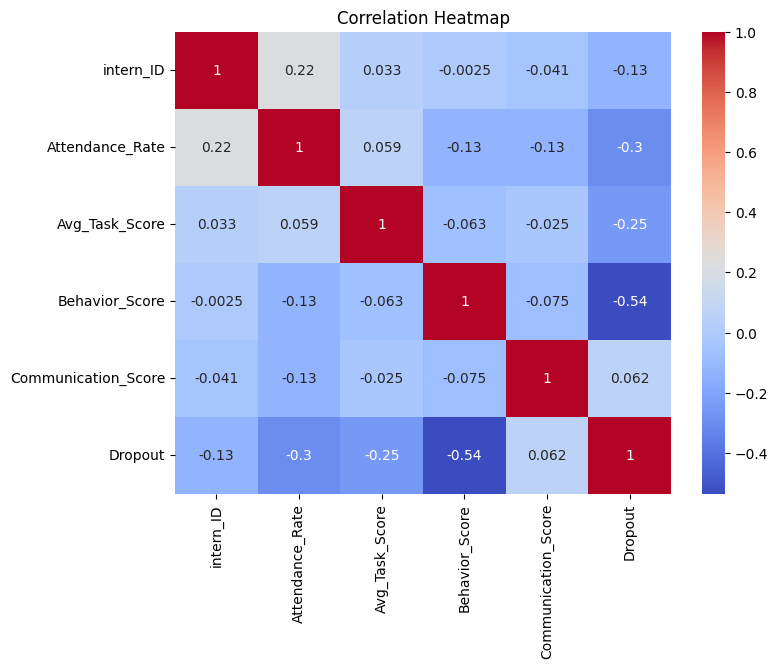

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# STEP 4: Visualize Key Patterns
We’ll use seaborn and matplotlib to draw:

- Distribution of numeric features

- Boxplots comparing Dropouts vs scores

- Correlation heatmap

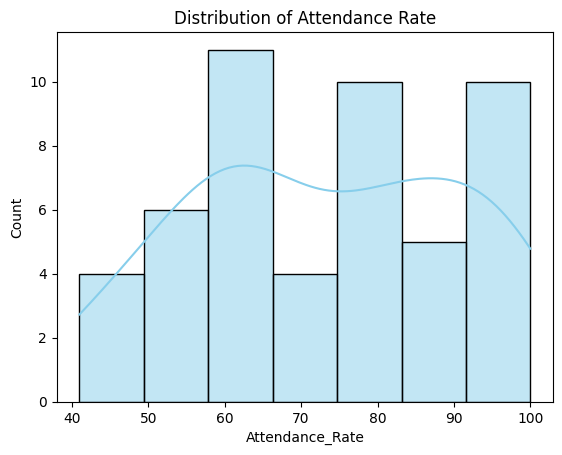

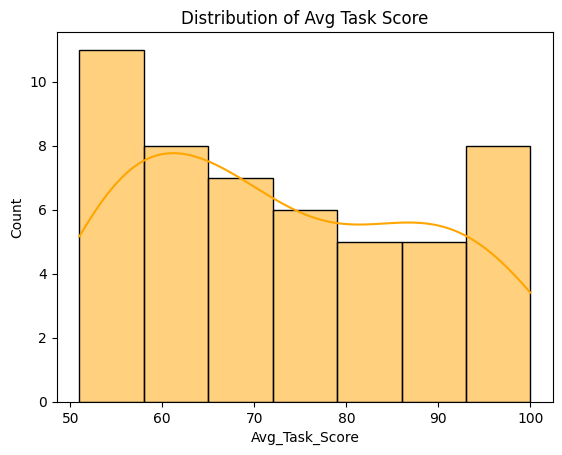

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Attendance
sns.histplot(df['Attendance_Rate'], kde=True, color='skyblue')
plt.title("Distribution of Attendance Rate")
plt.show()

# Distribution of Avg Task Score
sns.histplot(df['Avg_Task_Score'], kde=True, color='orange')
plt.title("Distribution of Avg Task Score")
plt.show()


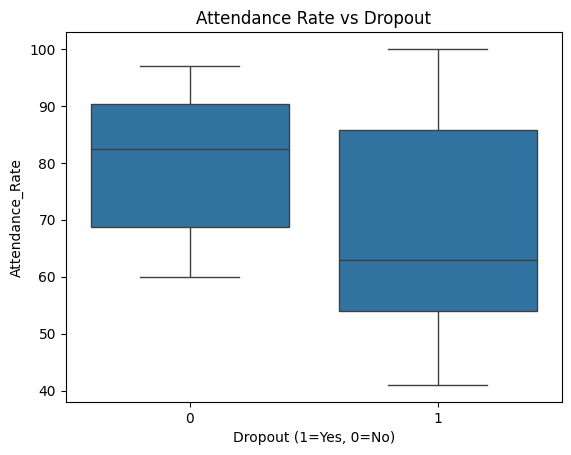

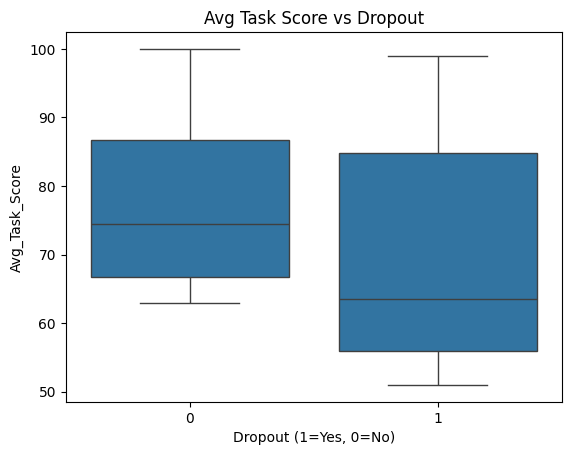

In [23]:
# Dropout vs Attendance
sns.boxplot(x=df['Dropout'], y=df['Attendance_Rate'])
plt.title("Attendance Rate vs Dropout")
plt.xlabel("Dropout (1=Yes, 0=No)")
plt.show()

# Dropout vs Task Score
sns.boxplot(x=df['Dropout'], y=df['Avg_Task_Score'])
plt.title("Avg Task Score vs Dropout")
plt.xlabel("Dropout (1=Yes, 0=No)")
plt.show()


# STEP 5: Train a Machine Learning Model to Predict Dropouts

We’ll:

- Split the data into train & test sets

- Train a Decision Tree or Logistic Regression model

- Evaluate accuracy and predictions



In [25]:
from sklearn.model_selection import train_test_split

# Drop non-numeric/ID column
X = df.drop(columns=['intern_ID', 'Dropout'])  # Features
y = df['Dropout']                              # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (40, 4)
Test size: (10, 4)


### Decision Tree Classifier:

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# STEP 6: Feature Importance (Decision Tree)
This helps explain which inputs (like Attendance or Behavior) are influencing the model most.

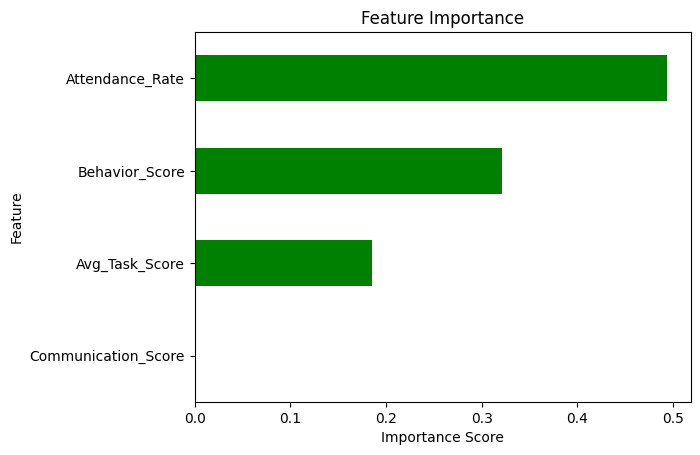

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained tree model
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot
feature_importance.sort_values().plot(kind='barh', color='green')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [30]:
 # Try Logistic Regression
 from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict & Evaluate
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6

    accuracy                           0.80        10
   macro avg       0.83      0.83      0.80        10
weighted avg       0.87      0.80      0.80        10



In [31]:
from google.colab import files
files.download('intern_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>